Any function can be approximated by combining other functions. One such combination, most commonly used with periodic functions, is known as the Fourier Series. It is given by:

$$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n cos(nx) + \sum_{m=1}^{\infty} b_m sin(mx)
$$

The coefficients $a_n$ and %b_m$ are found by relating them to the originial function.

$$
a_n = \frac{1}{\pi} \int^{2\pi}_0 f(s) \cos ns \; ds, \;\; n = 0,1,2,...
$$

and

$$
b_m = \frac{1}{\pi} \int^{2\pi}_0 f(s) \sin ms \; ds, \;\; m = 1,2,...
$$


 `SymPy`has a function which can be used to find the Fourier Series of a SymPy function.

In [1]:
import sympy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

sp.init_printing()

x = sp.symbols('x')

def func1(a):
    return sp.Piecewise((0,  a<0 ), (a,  a < sp.pi), (a - 2*sp.pi, a < 2*sp.pi), (0, True ))


def fsMyFunc(terms, var):
    return sp.fourier_series(func1(var), (var, 0, 2*sp.pi)).truncate(n=terms)

def plotMyFunc(terms):
   
    p1 = sp.plot(func1(x), show=False, line_color='b') 
    p2 = sp.plot(fsMyFunc(terms,x),(x, 0, 2* sp.pi), show=False, line_color='r')
    p1.append(p2[0])
    p1.show()
    return None

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = 8, 6

interact(plotMyFunc, terms=(1,10,1));

interactive(children=(IntSlider(value=5, description='terms', max=10, min=1), Output()), _dom_classes=('widget…

In [5]:
import numpy as np

x = sp.symbols('x')
dum = sp.symbols('dum')
sp.init_printing()

lam = 2
center = 1

def signal(x):
    return (x)

def mySpecialFunction(x):
    return sp.sin(2*x)

def b_m_amplitudes(n, funToProject, center, lam):
    return (2/lam)*sp.integrate(funToProject(dum)*sp.sin(2*n*sp.pi*dum/lam), (dum,center-lam/2,center+lam/2))

def a_n_amplitudes(m, funToProject, center, lam):
    return (2/lam)*sp.integrate(funToProject(dum)*sp.cos(2*m*sp.pi*dum/lam), (dum,center-lam/2,center+lam/2))

def b_m_vectorspace_element(n, var, lam):
    return sp.sin(2*n*sp.pi*var/lam)

def a_n_vectorspace_element(m, var, lam):
    if m==0:
        return sp.Rational(1,2)
    elif m!=0:
        return sp.cos(2*m*sp.pi*var/lam)
    
terms = 15
funToProject = signal

an_vectors = [a_n_vectorspace_element(n, x, lam) for n in range(terms)]
an_amplitudes = [a_n_amplitudes(n, funToProject, center, lam) for n in range(terms)]
bm_vectors = [b_m_vectorspace_element(m, x, lam) for m in range(terms)]
bm_amplitudes = [b_m_amplitudes(m, funToProject, center, lam) for m in range(terms)]

truncatedSeries = (sum([a*b for a,b in zip(an_vectors,an_amplitudes)]) 
                   + sum([c*d for c,d in zip(bm_vectors,bm_amplitudes)]))
truncatedSeries

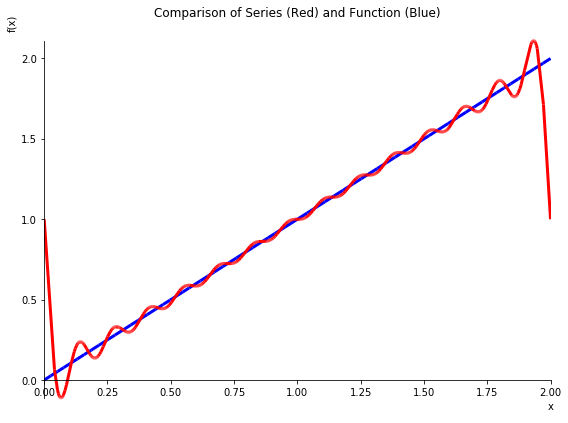

In [6]:
p = sp.plot(signal(x), truncatedSeries, (x, 0, 2), show=False, title=r'Comparison of Series (Red) and Function (Blue)')
p[0].line_color = 'blue'
p[1].line_color = 'red'
p.show()

In [2]:
from PIL import Image
import numpy as np

im = np.array(Image.open("Function.png"))
im

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255